In [135]:
# Correction of data of Monitoring Units from Hospital of Leiria (from Hospital Sudoe 4.0 project)

# Version 07  (last updated: 14/09/2022)
# Author: Nuno Canha
# Goal of the script: using the input dataset of the monitored data by MB508, it provides excel files with corrected data based in correction factors.

# Time window analysed: August2021-July2022

# MONITORING BOX TO BE ANALISED: MB508

In [136]:
# To run this notebook, you will only need to:
# 1) Define the working folder
# 2) Enter the name of the Monitoring Unit that you are analysing

In [137]:
# To check the working folder and use "cd" to enter on the working folder

In [138]:
pwd

'C:\\Users\\nunocanha\\Desktop\\Hospital Sudoe 4.0\\Correction of Sensors data\\MB508'

In [139]:
#To enter in the correct folder:

In [140]:
cd C:\\Users\\nunocanha\\Desktop\\Hospital Sudoe 4.0\\Correction of Sensors data\\MB508

C:\Users\nunocanha\Desktop\Hospital Sudoe 4.0\Correction of Sensors data\MB508


In [141]:
# Loading the data
name = input('Which Monitoring Unit is being analised?')

Which Monitoring Unit is being analised? MB508


In [142]:
# Upload the analysis packages

In [143]:
import pandas as pd

In [144]:
import matplotlib.pyplot as plt
from datetime import datetime

In [145]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [146]:
# Upload the data to create a single dataset based on the single files provided by the monitoring box:

dataCO2 = pd.read_csv("co2.csv", delimiter=";", na_values=['NA'])
dataRH = pd.read_csv("humidity.csv", delimiter=";", na_values=['NA'])
dataT = pd.read_csv("temperature.csv", delimiter=";", na_values=['NA'])
dataVOCs = pd.read_csv("vocs.csv", delimiter=";", na_values=['NA'])
dataPM10 = pd.read_csv("pcpm10.csv", delimiter=";", na_values=['NA'])
dataPM25 = pd.read_csv("pcpm25.csv", delimiter=";", na_values=['NA'])
# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

# To work on the timestamp:
dataCO2['Date']=pd.to_datetime(dataCO2['unix_timestamp'], unit='s')

# To put together all the data:
dataALL=pd.concat([dataCO2, dataRH, dataT, dataVOCs, dataPM10, dataPM25], axis=1)

# To select only the target parameters and the timestamp:
data=dataALL[["Date","co2_number","humidity_number","temperature_number","vocs_number", "pcpm25_number","pcpm10_number"]]
data = data.set_index('Date')

# To rename the columns' names to simplify the code writting 
new_names={'co2_number':'CO2','humidity_number':'RH','temperature_number': 'T', 'vocs_number': 'VOCs', 'pcpm25_number':'PM25', 'pcpm10_number':'PM10' }
data = data.rename(columns=new_names)
data

,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,
2020-09-02 18:32:14,465.0,39.22,29.11,0.0,6.0,7.0
2020-09-02 18:32:41,461.0,38.87,29.30,0.0,6.0,7.0
2020-09-02 18:47:15,435.0,35.74,30.76,0.0,6.0,7.0
2020-09-02 19:02:16,518.0,33.98,31.36,43.0,8.0,9.0
2020-09-02 19:06:33,441.0,33.26,31.56,43.0,8.0,9.0
...,...,...,...,...,...,...
2022-09-09 09:25:09,785.0,62.75,27.05,589.0,7.0,8.0
2022-09-09 09:30:23,739.0,62.78,27.08,624.0,8.0,9.0
2022-09-09 09:35:10,698.0,62.57,27.11,672.0,5.0,6.0


In [147]:
# Adicionar as etiquetas temporais:
# Add columns with year, month, and weekday name
data1=data
data1['Year'] = data1.index.year
data1['Month'] = data1.index.month
data1['Day'] = data1.index.day
data1['Hour'] = data1.index.hour
data1['Minute'] = data1.index.minute

data1

,CO2,RH,T,VOCs,PM25,PM10,Year,Month,Day,Hour,Minute
Date,,,,,,,,,,,
2020-09-02 18:32:14,465.0,39.22,29.11,0.0,6.0,7.0,2020,9,2,18,32
2020-09-02 18:32:41,461.0,38.87,29.30,0.0,6.0,7.0,2020,9,2,18,32
2020-09-02 18:47:15,435.0,35.74,30.76,0.0,6.0,7.0,2020,9,2,18,47
2020-09-02 19:02:16,518.0,33.98,31.36,43.0,8.0,9.0,2020,9,2,19,2
2020-09-02 19:06:33,441.0,33.26,31.56,43.0,8.0,9.0,2020,9,2,19,6
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09 09:25:09,785.0,62.75,27.05,589.0,7.0,8.0,2022,9,9,9,25
2022-09-09 09:30:23,739.0,62.78,27.08,624.0,8.0,9.0,2022,9,9,9,30
2022-09-09 09:35:10,698.0,62.57,27.11,672.0,5.0,6.0,2022,9,9,9,35


In [148]:
# Selecionar um período temporal e criar uma nova base de dados apenas com esse período

data2=data1[(data1.index > '2021-08-01 00:00:00')]
dataHL=data2[(data2.index < '2022-07-31 23:59:59')]
dataHL

# Export to csv
output_dataHL  = 'data_' + name + '_rawdata.csv'
dataHL.to_csv(output_dataHL, sep=',')

In [149]:
# Aplicar os factores de correção calculados

dataHL['CO2_c']=(dataHL['CO2']*1.0166)+17.49
dataHL['RH_c']=(dataHL['RH']*1.0751)+6.1927
dataHL['T_c']=(dataHL['T']*0.7212)+3.0808
dataHL['VOCs_c']=(dataHL['VOCs']*2.7319)-921.97
dataHL['PM25_c']=(dataHL['PM25']*2.9428)+5.372
dataHL['PM10_c']=(dataHL['PM10']*2.9842)+2.8067
dataHL

C:\Users\nunocanha\AppData\Local\Temp\ipykernel_27032\3501289817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataHL['CO2_c']=(dataHL['CO2']*1.0166)+17.49
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_27032\3501289817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataHL['RH_c']=(dataHL['RH']*1.0751)+6.1927
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_27032\3501289817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,CO2,RH,T,VOCs,PM25,PM10,Year,Month,Day,Hour,Minute,CO2_c,RH_c,T_c,VOCs_c,PM25_c,PM10_c
Date,,,,,,,,,,,,,,,,,
2021-08-01 00:02:50,334.0,45.77,25.95,401.0,6.0,7.0,2021,8,1,0,2,357.0344,55.400027,21.795940,173.5219,23.0288,23.6961
2021-08-01 00:07:55,339.0,45.78,25.96,401.0,7.0,8.0,2021,8,1,0,7,362.1174,55.410778,21.803152,173.5219,25.9716,26.6803
2021-08-01 00:12:50,344.0,45.73,25.93,401.0,6.0,7.0,2021,8,1,0,12,367.2004,55.357023,21.781516,173.5219,23.0288,23.6961
2021-08-01 00:18:01,343.0,45.75,25.95,375.0,7.0,8.0,2021,8,1,0,18,366.1838,55.378525,21.795940,102.4925,25.9716,26.6803
2021-08-01 00:22:51,338.0,45.75,25.96,397.0,6.0,7.0,2021,8,1,0,22,361.1008,55.378525,21.803152,162.5943,23.0288,23.6961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 23:39:11,408.0,50.11,27.96,344.0,7.0,8.0,2022,7,31,23,39,432.2628,60.065961,23.245552,17.8036,25.9716,26.6803
2022-07-31 23:44:13,409.0,50.18,28.00,366.0,7.0,8.0,2022,7,31,23,44,433.2794,60.141218,23.274400,77.9054,25.9716,26.6803
2022-07-31 23:49:13,408.0,50.19,27.97,371.0,9.0,10.0,2022,7,31,23,49,432.2628,60.151969,23.252764,91.5649,31.8572,32.6487


In [150]:
datac=dataHL.drop(['CO2','RH','T','VOCs','PM25','PM10'], axis=1)

# To rename the columns' names to simplify the code writting 
new_names2={'CO2_c':'CO2','RH_c':'RH','T_c': 'T', 'VOCs_c': 'VOCs', 'PM25_c':'PM25', 'PM10_c':'PM10' }
datac1 = datac.rename(columns=new_names2)

import numpy as np 
# Limpeza de dados: valores abaixo de 0 (para todos os parâmetros), excepto para CO2 (apenas valores acima de 380 ppm são mantidos):

datac2=datac1
datac2['VOCs']=datac2['VOCs'].mask(datac2['VOCs']<= 0)
datac2['T']=datac2['T'].mask(datac2['T']<= 0)
datac2['RH']=datac2['RH'].mask(datac2['RH']<= 0)
datac2['CO2']=datac2['CO2'].mask(datac2['CO2']<380)
datac2['PM25']=datac2['PM25'].mask(datac2['PM25']<=0)
datac2['PM25']=datac2['PM25'].mask(datac2['PM25']>500)
datac2['PM10']=datac2['PM10'].mask(datac2['PM10']<=0)
datac2['PM10']=datac2['PM10'].mask(datac2['PM10']>500)

datacf=datac2
datacf

,Year,Month,Day,Hour,Minute,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,,,,,,
2021-08-01 00:02:50,2021,8,1,0,2,NaN,55.400027,21.795940,173.5219,23.0288,23.6961
2021-08-01 00:07:55,2021,8,1,0,7,NaN,55.410778,21.803152,173.5219,25.9716,26.6803
2021-08-01 00:12:50,2021,8,1,0,12,NaN,55.357023,21.781516,173.5219,23.0288,23.6961
2021-08-01 00:18:01,2021,8,1,0,18,NaN,55.378525,21.795940,102.4925,25.9716,26.6803
2021-08-01 00:22:51,2021,8,1,0,22,NaN,55.378525,21.803152,162.5943,23.0288,23.6961
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 23:39:11,2022,7,31,23,39,432.2628,60.065961,23.245552,17.8036,25.9716,26.6803
2022-07-31 23:44:13,2022,7,31,23,44,433.2794,60.141218,23.274400,77.9054,25.9716,26.6803
2022-07-31 23:49:13,2022,7,31,23,49,432.2628,60.151969,23.252764,91.5649,31.8572,32.6487


In [151]:
# Import seaborn for visualisation tools

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(14, 6)})

In [152]:
# Resampling CO2 data

# Resample getting a several statistics parameters - Daily data
dailyCO2 = datacf['CO2'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyCO2['Year'] = dailyCO2.index.year
dailyCO2['Month'] = dailyCO2.index.month
dailyCO2['Day'] = dailyCO2.index.day


# Export to csv
output_dailyCO2  = 'data_' + name + '_dailyCO2.csv'
dailyCO2.to_csv(output_dailyCO2 , sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyCO2 = datacf['CO2'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyCO2['Year'] = hourlyCO2.index.year
hourlyCO2['Month'] = hourlyCO2.index.month
hourlyCO2['Day'] = hourlyCO2.index.day
hourlyCO2['Hour'] = hourlyCO2.index.hour
hourlyCO2

# Export to csv
output_hourlyCO2  = 'data_' + name + '_hourlyCO2.csv'
hourlyCO2.to_csv(output_hourlyCO2 , sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyCO2 = datacf['CO2'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyCO2['Year'] = monthlyCO2.index.year
monthlyCO2['Month'] = monthlyCO2.index.month
monthlyCO2['Day'] = monthlyCO2.index.day
monthlyCO2

# Export to csv
output_monthlyCO2  = 'data_' + name + '_monthlyCO2.csv'
monthlyCO2.to_csv(output_monthlyCO2 , sep=',')

# Transpose the dataset:
series1 = pd.pivot_table(dailyCO2, index = 'Month', columns = 'Day', values = 'mean') 

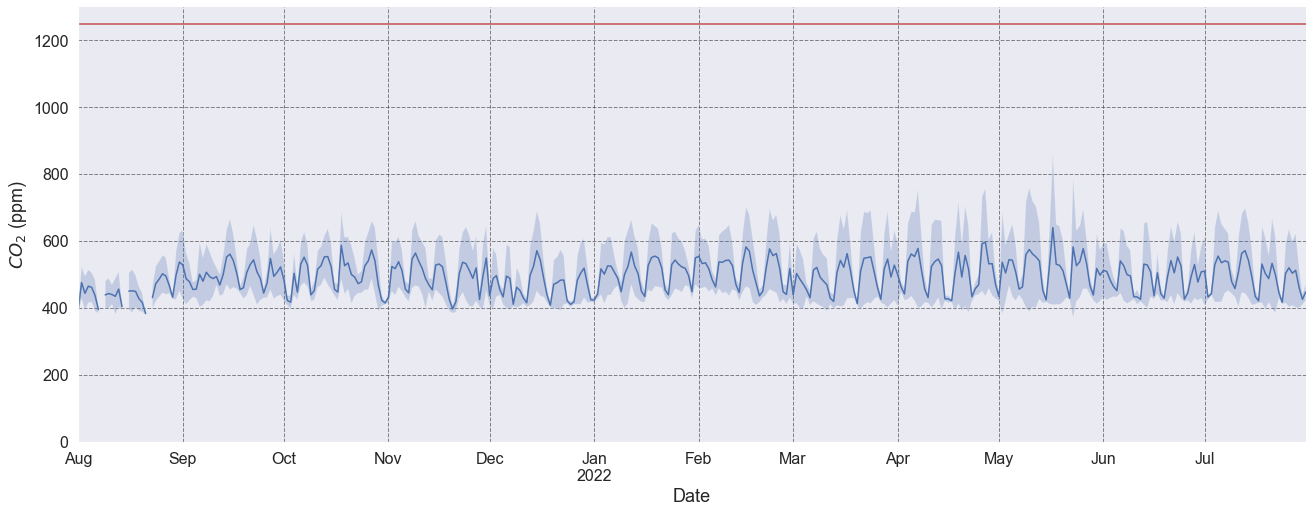

In [153]:
# Daily plot (Mean + SD) - All data

ax = dailyCO2['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyCO2.index, dailyCO2['mean'] - dailyCO2['std'], dailyCO2['mean'] + dailyCO2['std'], alpha=.25)
ax.axhline(y=1250, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,1300)

plt.ylabel("$CO_{2}$ (ppm)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig1a - Daily mean CO2 - all data @ '+ name) 



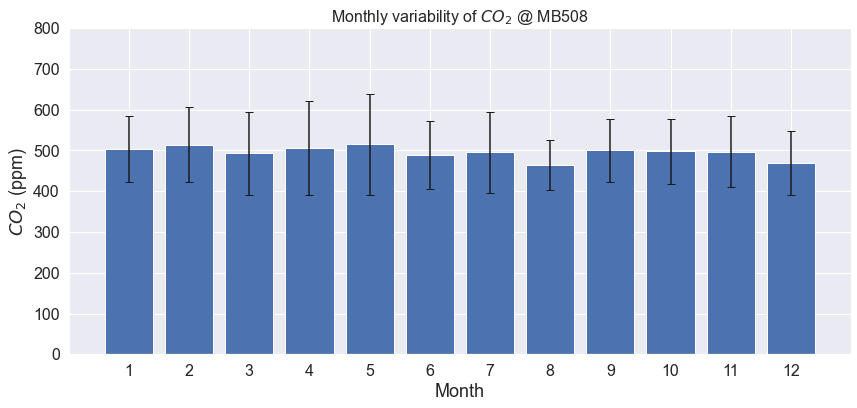

In [154]:
# Plot of box plots of daily CO2 data:

Fig1b, ax = plt.subplots()

ax.bar(x=monthlyCO2['Month'], #x-coordinates of bars
       height=monthlyCO2['mean'], #height of bars
       yerr=monthlyCO2['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel('$CO_{2}$ (ppm)',fontsize=18)
ax.set_title('Monthly variability of $CO_{2}$ @ '+ name, fontsize=16)
ax.set_ylim(0,800)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.xticks(monthlyCO2['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig1b - Monthly variability of CO2 @ '+ name)



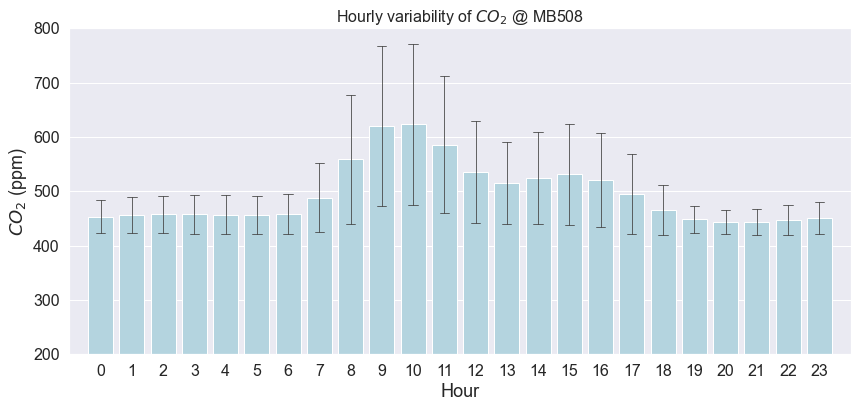

In [155]:
# Plot of box plots of Hourly data:
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

Fig1c = sns.barplot(x="Hour", y="CO2", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig1c.set_ylabel('$CO_{2}$ (ppm)',fontsize=18)
Fig1c.set_title('Hourly variability of $CO_{2}$ @ '+ name, fontsize=16)

Fig1c.tick_params(axis='x', labelsize=16)
Fig1c.tick_params(axis='y', labelsize=16)
Fig1c.set_ylim(200,800)
Fig1c.set_xlim(-1,24)

Fig1c.xaxis.set_major_formatter(ticker.EngFormatter())

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig1c - Hourly variability of CO2 @ '+ name)

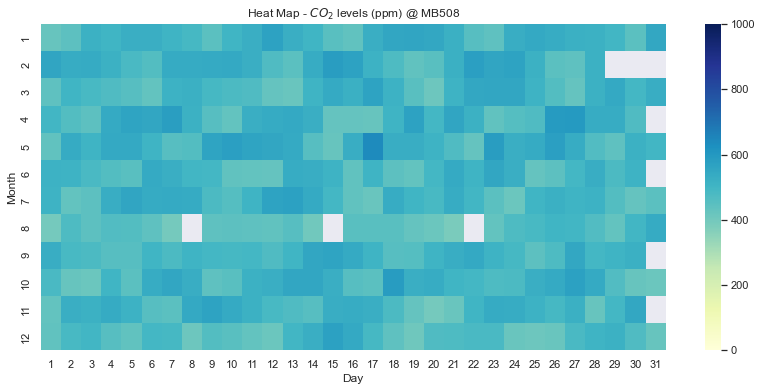

In [156]:
# Heatmap of daily data over months - CO2:

Fig1d = sns.heatmap(series1, vmin=0, vmax=1000, cmap="YlGnBu")
Fig1d.set_title('Heat Map - $CO_{2}$ levels (ppm) @ '+ name)
plt.savefig('Fig1d - Heat Map - CO2 levels @ '+ name)

In [157]:
# Evaluation of Temperature variability

# Resample getting a several statistics parameters - Daily data
dailyT = datacf['T'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyT['Year'] = dailyT.index.year
dailyT['Month'] = dailyT.index.month
dailyT['Day'] = dailyT.index.day


# Export to csv
output_dailyT  = 'data_' + name + '_dailyT.csv'
dailyT.to_csv(output_dailyT , sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyT = datacf['T'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyT['Year'] = hourlyT.index.year
hourlyT['Month'] = hourlyT.index.month
hourlyT['Day'] = hourlyT.index.day
hourlyT

# Export to csv
output_hourlyT  = 'data_' + name + '_hourlyT.csv'
hourlyT.to_csv(output_hourlyT , sep=',')

hourlyT

# Resample getting a several statistics parameters - Monthly data
monthlyT = datacf['T'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyT['Year'] = monthlyT.index.year
monthlyT['Month'] = monthlyT.index.month
monthlyT['Day'] = monthlyT.index.day
monthlyT

# Export to csv
output_monthlyT  = 'data_' + name + '_monthlyT.csv'
monthlyT.to_csv(output_monthlyT , sep=',')


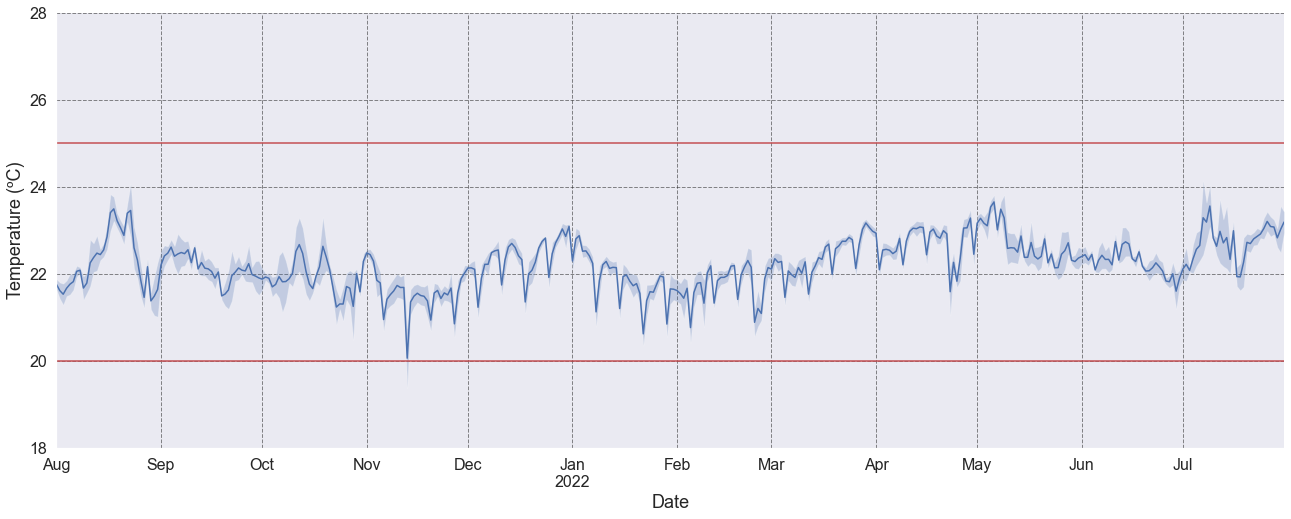

In [158]:
# Daily plot (Mean + SD) - All data - T

ax = dailyT['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyT.index, dailyT['mean'] - dailyT['std'], dailyT['mean'] + dailyT['std'], alpha=.25)
ax.axhline(y=20, color='r', linestyle='-')
ax.axhline(y=25, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(18,28)

plt.ylabel("Temperature (ºC)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig2a - Daily mean T - all data @ '+ name) 

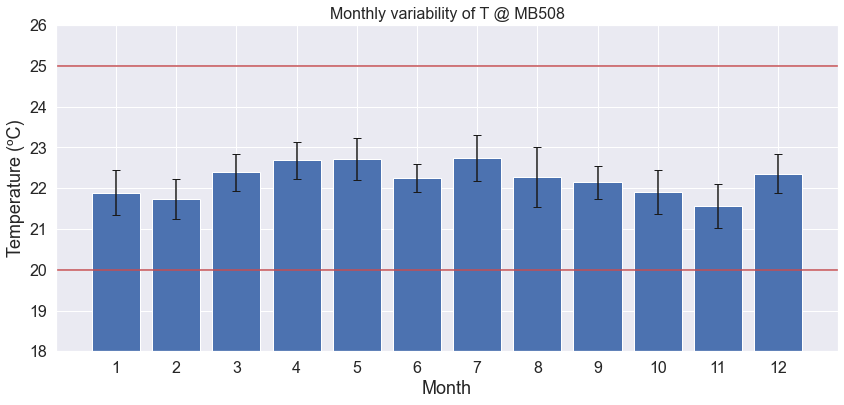

In [159]:
# Plot of box plots of daily T data:

Fig2b, ax = plt.subplots()

ax.bar(x=monthlyT['Month'], #x-coordinates of bars
       height=monthlyT['mean'], #height of bars
       yerr=monthlyT['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel('Temperature (ºC)',fontsize=18)
ax.set_title('Monthly variability of T @ '+ name, fontsize=16)
ax.set_ylim(18,26)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=20, color='r', linestyle='-')
ax.axhline(y=25, color='r', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig2b - Monthly variability of T @ '+ name)

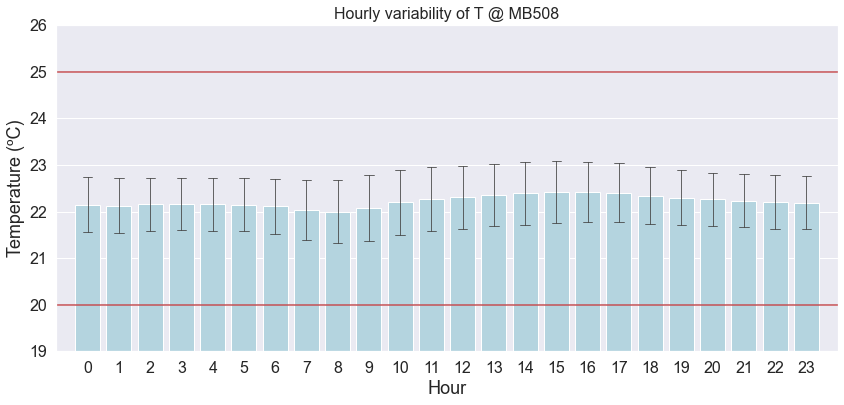

In [160]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig2c = sns.barplot(x="Hour", y="T", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig2c.set_ylabel('Temperature (ºC)',fontsize=18)
Fig2c.set_title('Hourly variability of T @ '+ name, fontsize=16)

Fig2c.tick_params(axis='x', labelsize=16)
Fig2c.tick_params(axis='y', labelsize=16)
Fig2c.set_ylim(19,26)
Fig2c.set_xlim(-1,24)

Fig2c.xaxis.set_major_formatter(ticker.EngFormatter())

Fig2c.axhline(y=20, color='r', linestyle='-')
Fig2c.axhline(y=25, color='r', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig2c - Hourly variability of T @ '+ name)

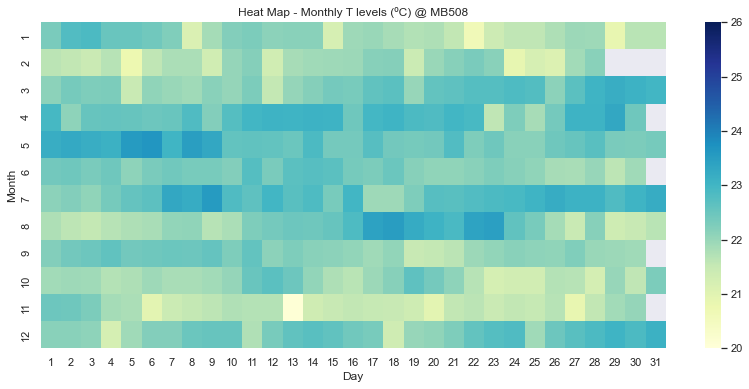

In [161]:
#Heat Map

# Transpose the dataset:

series2 = pd.pivot_table(dailyT, index = 'Month', columns = 'Day', values = 'mean') 
Fig2d = sns.heatmap(series2, vmin=20, vmax=26, cmap="YlGnBu")
Fig2d.set_title('Heat Map - Monthly T levels (ºC) @ '+ name)
plt.savefig('Fig2d - Heat Map - T levels @ '+ name)

In [162]:
# Evaluation of VOCs variability

# Resample getting a several statistics parameters - Daily data
dailyVOCs = datacf['VOCs'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyVOCs['Year'] = dailyVOCs.index.year
dailyVOCs['Month'] = dailyVOCs.index.month
dailyVOCs['Day'] = dailyVOCs.index.day


# Export to csv
output_dailyVOCs  = 'data_' + name + '_dailyVOCs.csv'
dailyVOCs.to_csv(output_dailyVOCs , sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyVOCs = datacf['VOCs'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyVOCs['Year'] = hourlyVOCs.index.year
hourlyVOCs['Month'] = hourlyVOCs.index.month
hourlyVOCs['Day'] = hourlyVOCs.index.day
hourlyVOCs

# Export to csv
output_hourlyVOCs  = 'data_' + name + '_hourlyVOCs.csv'
hourlyVOCs.to_csv(output_hourlyVOCs , sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyVOCs = datacf['VOCs'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyVOCs['Year'] = monthlyVOCs.index.year
monthlyVOCs['Month'] = monthlyVOCs.index.month
monthlyVOCs['Day'] = monthlyVOCs.index.day

# Export to csv
output_monthlyVOCs  = 'data_' + name + '_monthlyVOCs.csv'
monthlyVOCs.to_csv(output_monthlyVOCs, sep=',')

monthlyVOCs

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,231.015059,175.221764,8112,187.18140,6.876,1296.3328,2021,8,31
2021-09-30,277.126862,195.620375,7804,222.69610,6.876,1654.2117,2021,9,30
2021-10-31,230.241002,159.087685,8278,198.10900,6.876,1129.6869,2021,10,31
2021-11-30,247.509950,211.041634,7265,173.52190,6.876,1356.4346,2021,11,30
2021-12-31,241.673831,191.793115,6043,198.10900,6.876,1544.9357,2021,12,31
2022-01-31,276.699360,219.353902,6938,209.03660,6.876,1509.4210,2022,1,31
2022-02-28,259.230691,199.787547,6051,209.03660,6.876,1689.7264,2022,2,28
2022-03-31,249.459716,200.847522,5583,198.10900,6.876,1091.4403,2022,3,31
2022-04-30,259.223237,223.113634,4714,180.35165,6.876,1487.5658,2022,4,30


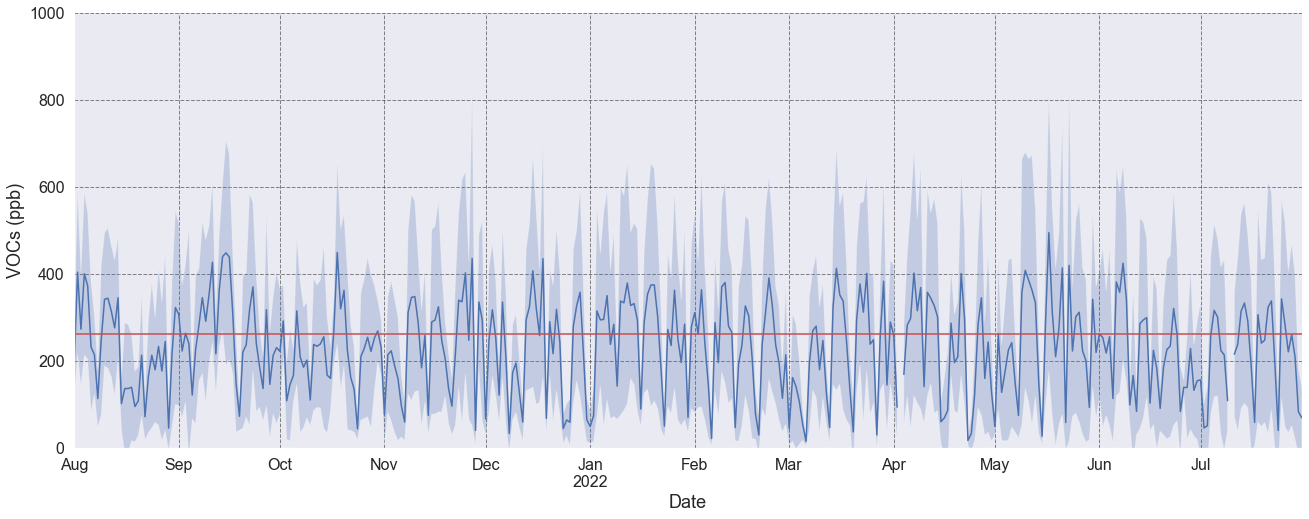

In [163]:
# Daily plot (Mean + SD) - All data - VOCs

ax = dailyVOCs['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyVOCs.index, dailyVOCs['mean'] - dailyVOCs['std'], dailyVOCs['mean'] + dailyVOCs['std'], alpha=.25)
ax.axhline(y=262, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,1000)

plt.ylabel("VOCs (ppb)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig3a - Daily mean VOCs - all data @ '+ name) 

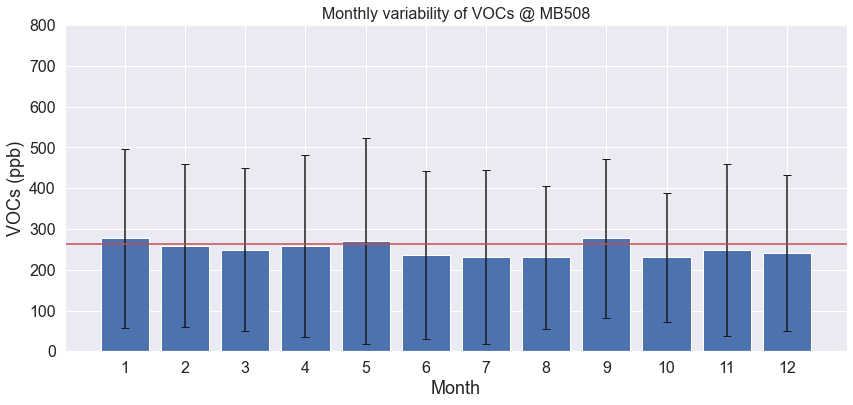

In [164]:
# Plot of box plots of daily VOCs data:

Fig3b, ax = plt.subplots()

ax.bar(x=monthlyVOCs['Month'], #x-coordinates of bars
       height=monthlyVOCs['mean'], #height of bars
       yerr=monthlyVOCs['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel('VOCs (ppb)',fontsize=18)
ax.set_title('Monthly variability of VOCs @ '+ name, fontsize=16)
ax.set_ylim(0,800)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=262, color='r', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig3b - Monthly variability of VOCs @ '+ name)

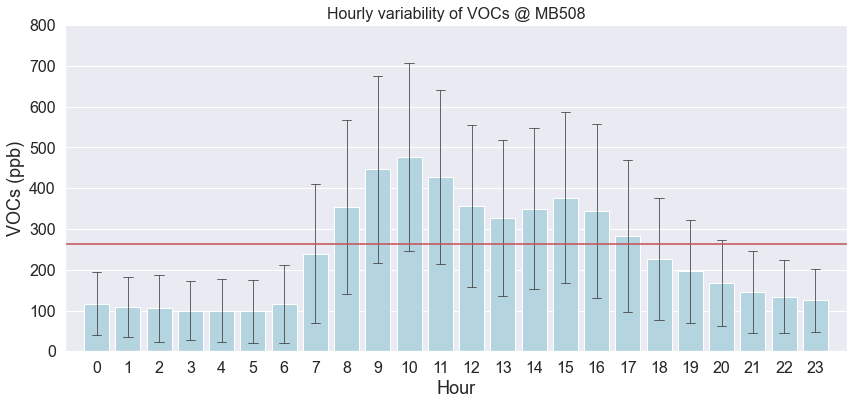

In [165]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig3c = sns.barplot(x="Hour", y="VOCs", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig3c.set_ylabel('VOCs (ppb)',fontsize=18)
Fig3c.set_title('Hourly variability of VOCs @ '+ name, fontsize=16)

Fig3c.tick_params(axis='x', labelsize=16)
Fig3c.tick_params(axis='y', labelsize=16)
Fig3c.set_ylim(0,800)
Fig3c.set_xlim(-1,24)

Fig3c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig3c.axhline(y=262, color='r', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig3c - Hourly variability of VOCs @ '+ name)

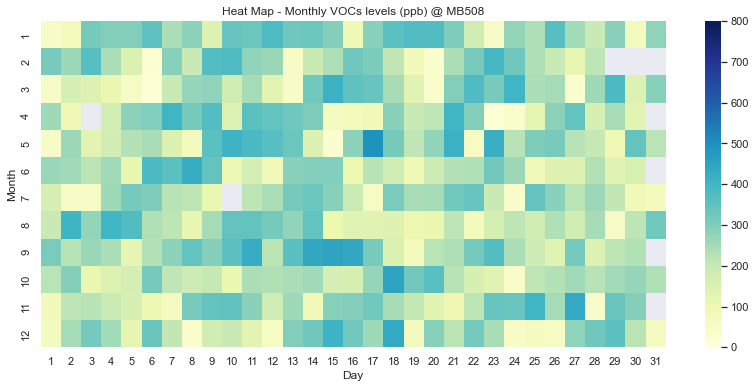

In [166]:
#Heat Map

# Transpose the dataset:

series3 = pd.pivot_table(dailyVOCs, index = 'Month', columns = 'Day', values = 'mean') 
Fig3d = sns.heatmap(series3, vmin=0, vmax=800, cmap="YlGnBu")
Fig3d.set_title('Heat Map - Monthly VOCs levels (ppb) @ '+ name)
plt.savefig('Fig3d - Heat Map - VOCs levels @ '+ name)

In [167]:
# Evaluation of PM2.5 variability

# Resample getting a several statistics parameters - Daily data
dailyPM25 = datacf['PM25'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyPM25['Year'] = dailyPM25.index.year
dailyPM25['Month'] = dailyPM25.index.month
dailyPM25['Day'] = dailyPM25.index.day


# Export to csv
output_dailyPM25  = 'data_' + name + '_dailyPM25.csv'
dailyPM25.to_csv(output_dailyPM25, sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyPM25 = datacf['PM25'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyPM25['Year'] = hourlyPM25.index.year
hourlyPM25['Month'] = hourlyPM25.index.month
hourlyPM25['Day'] = hourlyPM25.index.day
hourlyPM25

# Export to csv
output_hourlyPM25  = 'data_' + name + '_hourlyPM25.csv'
hourlyPM25.to_csv(output_hourlyPM25, sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyPM25 = datacf['PM25'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyPM25['Year'] = monthlyPM25.index.year
monthlyPM25['Month'] = monthlyPM25.index.month
monthlyPM25['Day'] = monthlyPM25.index.day

# Export to csv
output_monthlyPM25  = 'data_' + name + '_monthlyPM25.csv'
monthlyPM25.to_csv(output_monthlyPM25, sep=',')

monthlyPM25

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,22.461168,11.763063,8943,20.0860,5.372,184.8828,2021,8,31
2021-09-30,17.597437,9.103686,8461,14.2004,5.372,73.0564,2021,9,30
2021-10-31,21.292923,12.422439,8946,20.0860,5.372,114.2556,2021,10,31
2021-11-30,37.844898,29.789656,8647,31.8572,5.372,267.2812,2021,11,30
2021-12-31,20.416863,16.184043,8752,14.2004,5.372,193.7112,2021,12,31
2022-01-31,28.778736,19.375091,8937,23.0288,5.372,146.6264,2022,1,31
2022-02-28,29.751447,22.979692,8065,23.0288,5.372,264.3384,2022,2,28
2022-03-31,18.547950,13.015858,8941,14.2004,5.372,99.5416,2022,3,31
2022-04-30,12.402332,6.757313,8450,11.2576,5.372,67.1708,2022,4,30


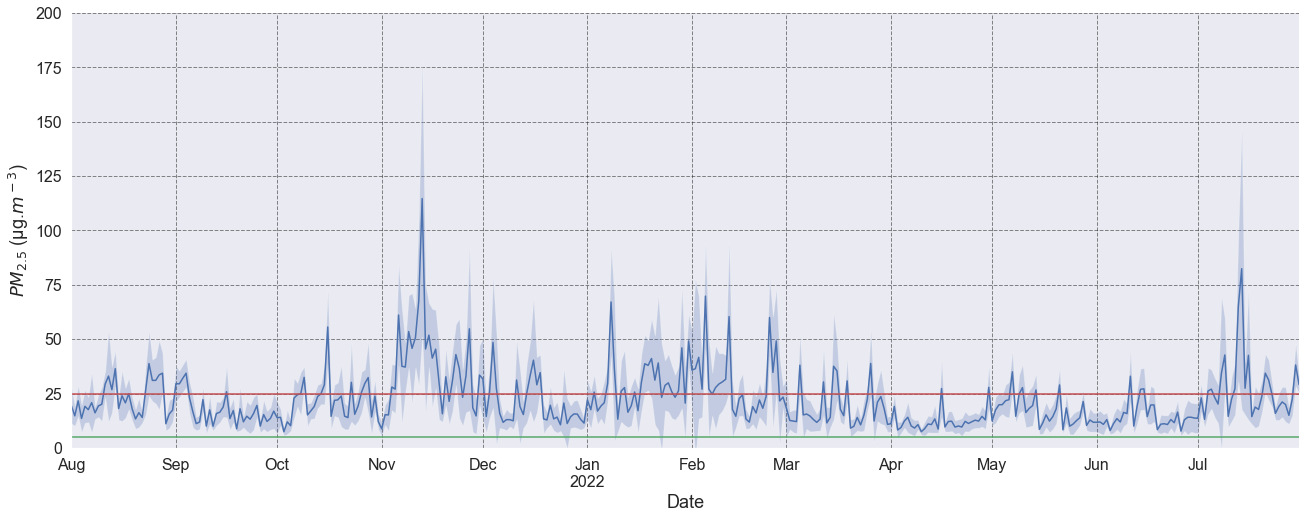

In [168]:
# Daily plot (Mean + SD) - All data - PM2.5

ax = dailyPM25['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyPM25.index, dailyPM25['mean'] - dailyPM25['std'], dailyPM25['mean'] + dailyPM25['std'], alpha=.25)
ax.axhline(y=25, color='r', linestyle='-')
ax.axhline(y=5, color='g', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,200)

plt.ylabel("$PM_{2.5}$ (μg.$m^-$$^3$)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig4a - Daily mean PM25 - all data @ '+ name) 

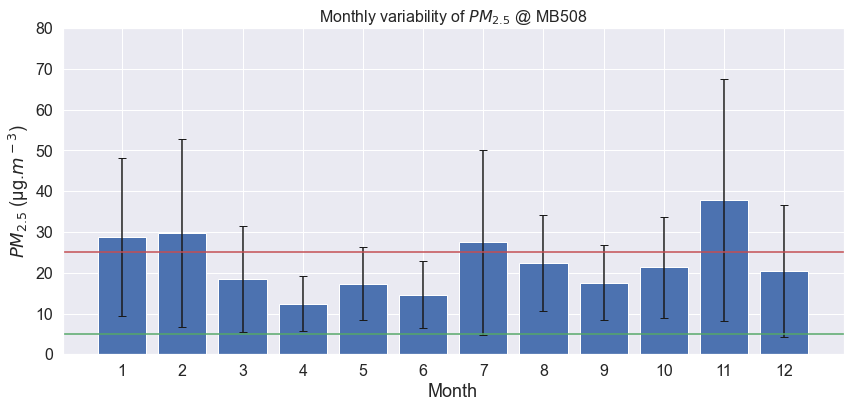

In [169]:
# Plot of box plots of daily PM2.5 data:

Fig4b, ax = plt.subplots()

ax.bar(x=monthlyPM25['Month'], #x-coordinates of bars
       height=monthlyPM25['mean'], #height of bars
       yerr=monthlyPM25['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel("$PM_{2.5}$ (μg.$m^-$$^3$)",fontsize=18)
ax.set_title('Monthly variability of $PM_{2.5}$ @ '+ name, fontsize=16)
ax.set_ylim(0,80)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=25, color='r', linestyle='-')
ax.axhline(y=5, color='g', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig4b - Monthly variability of PM25 @ '+ name)

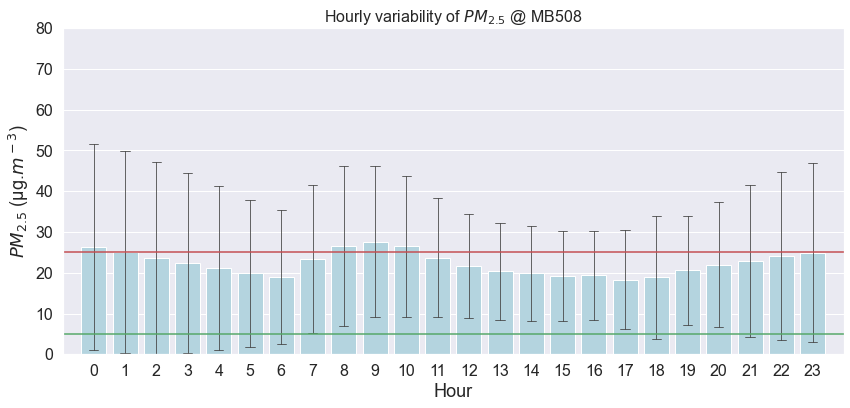

In [170]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig4c = sns.barplot(x="Hour", y="PM25", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig4c.set_ylabel('$PM_{2.5}$ (μg.$m^-$$^3$)',fontsize=18)
Fig4c.set_title('Hourly variability of $PM_{2.5}$ @ '+ name, fontsize=16)

Fig4c.tick_params(axis='x', labelsize=16)
Fig4c.tick_params(axis='y', labelsize=16)
Fig4c.set_ylim(0,80)
Fig4c.set_xlim(-1,24)

Fig4c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig4c.axhline(y=25, color='r', linestyle='-')
Fig4c.axhline(y=5, color='g', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig4c - Hourly variability of PM25 @ '+ name)

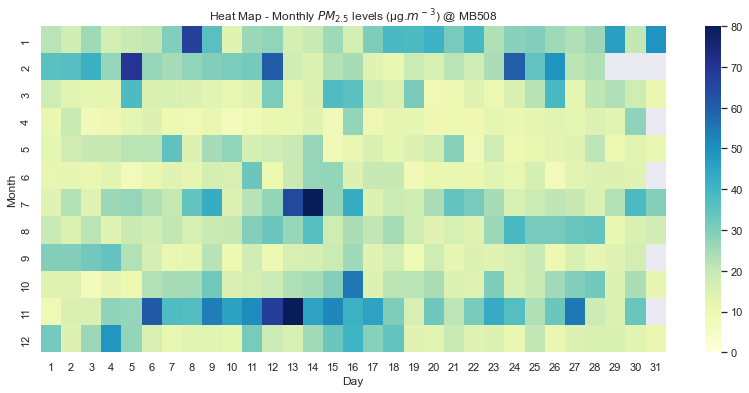

In [171]:
#Heat Map

# Transpose the dataset:

series4 = pd.pivot_table(dailyPM25, index = 'Month', columns = 'Day', values = 'mean') 
Fig4d = sns.heatmap(series4, vmin=0, vmax=80, cmap="YlGnBu")
Fig4d.set_title('Heat Map - Monthly $PM_{2.5}$ levels (μg.$m^-$$^3$) @ '+ name)
plt.savefig('Fig4d - Heat Map - PM25 levels @ '+ name)

In [172]:
# Evaluation of PM10 variability

# Resample getting a several statistics parameters - Daily data
dailyPM10 = datacf['PM10'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyPM10['Year'] = dailyPM25.index.year
dailyPM10['Month'] = dailyPM25.index.month
dailyPM10['Day'] = dailyPM25.index.day


# Export to csv
output_dailyPM10  = 'data_' + name + '_dailyPM10.csv'
dailyPM10.to_csv(output_dailyPM10, sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyPM10 = datacf['PM10'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyPM10['Year'] = hourlyPM10.index.year
hourlyPM10['Month'] = hourlyPM10.index.month
hourlyPM10['Day'] = hourlyPM10.index.day
hourlyPM10

# Export to csv
output_hourlyPM10  = 'data_' + name + '_hourlyPM10.csv'
hourlyPM10.to_csv(output_hourlyPM10, sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyPM10 = datacf['PM10'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyPM10['Year'] = monthlyPM10.index.year
monthlyPM10['Month'] = monthlyPM10.index.month
monthlyPM10['Day'] = monthlyPM10.index.day

# Export to csv
output_monthlyPM10  = 'data_' + name + '_monthlyPM10.csv'
monthlyPM10.to_csv(output_monthlyPM10, sep=',')

monthlyPM10

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,23.126489,11.965598,8943,20.7119,5.7909,190.8113,2021,8,31
2021-09-30,18.188327,9.231759,8461,14.7435,5.7909,74.4275,2021,9,30
2021-10-31,21.953482,12.697928,8946,20.7119,5.7909,119.1905,2021,10,31
2021-11-30,38.927012,30.750202,8647,32.6487,5.7909,274.3689,2021,11,30
2021-12-31,21.097541,16.644446,8752,14.7435,5.7909,199.7639,2021,12,31
2022-01-31,29.611741,19.956177,8937,23.6961,5.7909,152.0167,2022,1,31
2022-02-28,30.649860,23.741298,8065,23.6961,5.7909,271.3847,2022,2,28
2022-03-31,19.158220,13.230055,8941,14.7435,5.7909,104.2695,2022,3,31
2022-04-30,12.920136,6.852376,8450,11.7593,5.7909,68.4591,2022,4,30


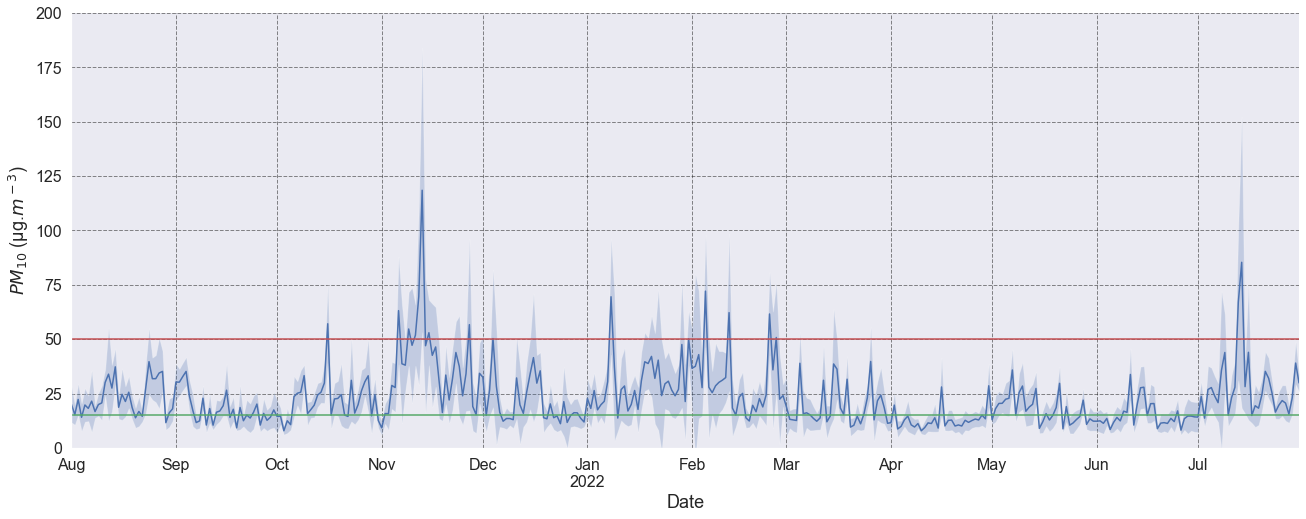

In [173]:
# Daily plot (Mean + SD) - All data - PM10

ax = dailyPM10['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyPM10.index, dailyPM10['mean'] - dailyPM10['std'], dailyPM10['mean'] + dailyPM10['std'], alpha=.25)
ax.axhline(y=50, color='r', linestyle='-')
ax.axhline(y=15, color='g', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,200)

plt.ylabel("$PM_{10}$ (μg.$m^-$$^3$)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig5a - Daily mean PM10 - all data @ '+ name) 

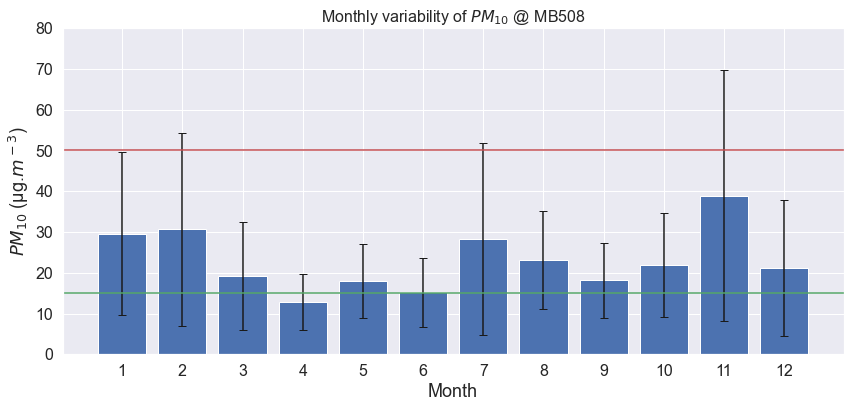

In [174]:
# Plot of box plots of daily PM2.5 data:

Fig5b, ax = plt.subplots()

ax.bar(x=monthlyPM10['Month'], #x-coordinates of bars
       height=monthlyPM10['mean'], #height of bars
       yerr=monthlyPM10['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel("$PM_{10}$ (μg.$m^-$$^3$)",fontsize=18)
ax.set_title('Monthly variability of $PM_{10}$ @ '+ name, fontsize=16)
ax.set_ylim(0,80)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax.axhline(y=50, color='r', linestyle='-')
ax.axhline(y=15, color='g', linestyle='-')

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig5b - Monthly variability of PM10 @ '+ name)

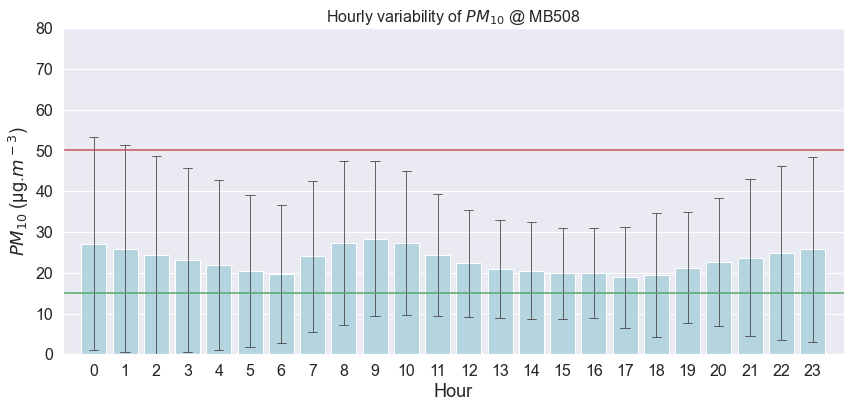

In [175]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig5c = sns.barplot(x="Hour", y="PM10", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig5c.set_ylabel('$PM_{10}$ (μg.$m^-$$^3$)',fontsize=18)
Fig5c.set_title('Hourly variability of $PM_{10}$ @ '+ name, fontsize=16)

Fig5c.tick_params(axis='x', labelsize=16)
Fig5c.tick_params(axis='y', labelsize=16)
Fig5c.set_ylim(0,80)
Fig5c.set_xlim(-1,24)

Fig5c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig5c.axhline(y=50, color='r', linestyle='-')
Fig5c.axhline(y=15, color='g', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig5c - Hourly variability of PM10 @ '+ name)

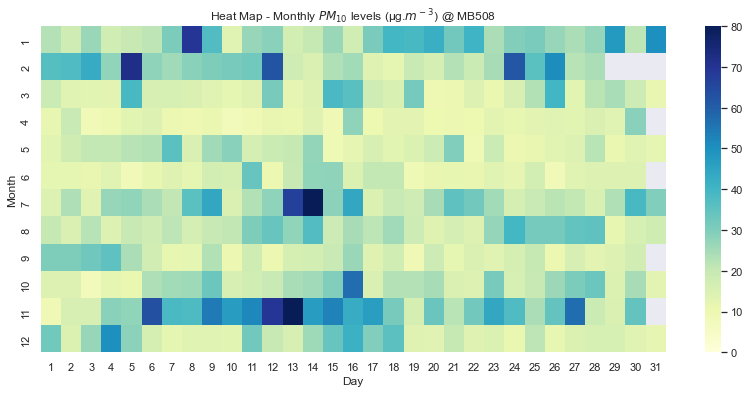

In [176]:
#Heat Map

# Transpose the dataset:

series5 = pd.pivot_table(dailyPM10, index = 'Month', columns = 'Day', values = 'mean') 
Fig5d = sns.heatmap(series5, vmin=0, vmax=80, cmap="YlGnBu")
Fig5d.set_title('Heat Map - Monthly $PM_{10}$ levels (μg.$m^-$$^3$) @ '+ name)
plt.savefig('Fig5d - Heat Map - PM10 levels @ '+ name)

In [177]:
# Evaluation of RH variability

# Resample getting a several statistics parameters - Daily data
dailyRH = datacf['RH'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
dailyRH['Year'] = dailyRH.index.year
dailyRH['Month'] = dailyRH.index.month
dailyRH['Day'] = dailyRH.index.day


# Export to csv
output_dailyRH  = 'data_' + name + '_dailyRH.csv'
dailyRH.to_csv(output_dailyRH, sep=',')

# Resample getting a several statistics parameters - Hourly data
hourlyRH = datacf['RH'].resample('H').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
hourlyRH['Year'] = hourlyRH.index.year
hourlyRH['Month'] = hourlyRH.index.month
hourlyRH['Day'] = hourlyRH.index.day
hourlyRH

# Export to csv
output_hourlyRH  = 'data_' + name + '_hourlyRH.csv'
hourlyRH.to_csv(output_hourlyRH, sep=',')

# Resample getting a several statistics parameters - Monthly data
monthlyRH = datacf['RH'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthlyRH['Year'] = monthlyRH.index.year
monthlyRH['Month'] = monthlyRH.index.month
monthlyRH['Day'] = monthlyRH.index.day

# Export to csv
output_monthlyRH  = 'data_' + name + '_monthlyRH.csv'
monthlyRH.to_csv(output_monthlyRH, sep=',')

monthlyRH

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2021-08-31,60.222875,5.020359,8943,60.506752,45.831637,76.246216,2021,8,31
2021-09-30,61.173937,6.424428,8461,61.614105,38.316688,76.547244,2021,9,30
2021-10-31,56.997373,8.232366,8946,55.754810,40.574398,73.676727,2021,10,31
2021-11-30,44.459744,5.754468,8647,43.659935,32.349883,67.806681,2021,11,30
2021-12-31,47.961156,6.846179,8752,47.944209,32.263875,62.710707,2021,12,31
2022-01-31,39.492741,5.950186,8937,38.144672,27.640945,56.389119,2022,1,31
2022-02-28,41.676984,5.580837,8065,41.208707,29.189089,54.722714,2022,2,28
2022-03-31,43.932031,4.722300,8941,43.799698,30.661976,54.862477,2022,3,31
2022-04-30,44.095647,6.519736,8450,45.304838,25.824026,59.173628,2022,4,30


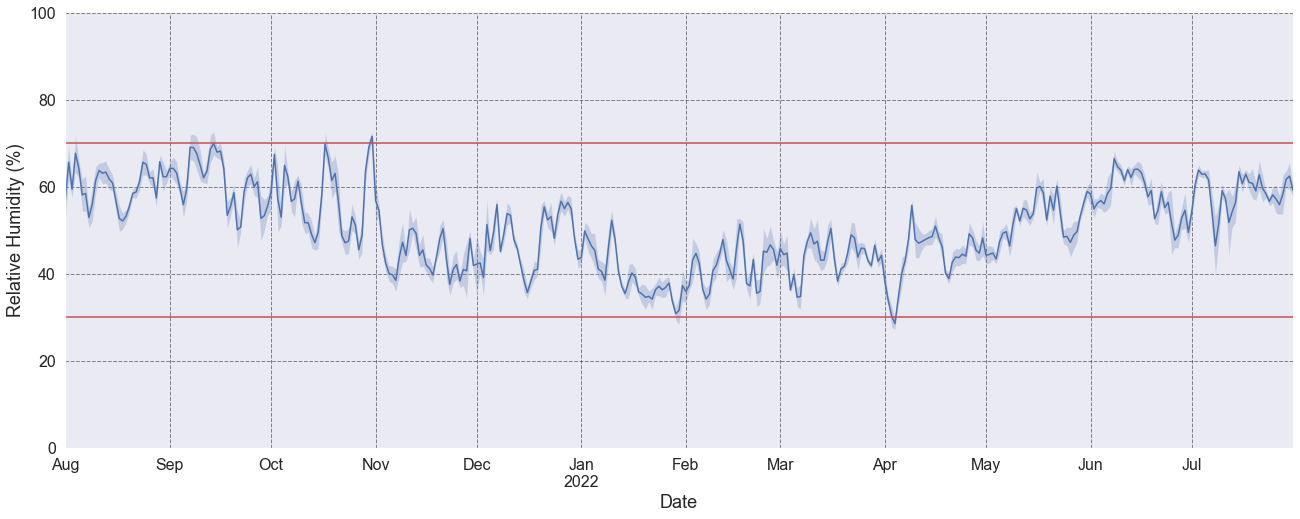

In [178]:
# Daily plot (Mean + SD) - All data - RH

ax = dailyRH['mean'].plot(figsize=(22, 8))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(dailyRH.index, dailyRH['mean'] - dailyRH['std'], dailyRH['mean'] + dailyRH['std'], alpha=.25)
ax.axhline(y=30, color='r', linestyle='-')
ax.axhline(y=70, color='r', linestyle='-')
plt.autoscale(enable=True, axis='x', tight=True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,100)

plt.ylabel("Relative Humidity (%)",fontsize=18)
plt.xlabel("Date",fontsize=18)

sns.despine()
plt.savefig('Fig6a - Daily mean RH - all data @ '+ name) 

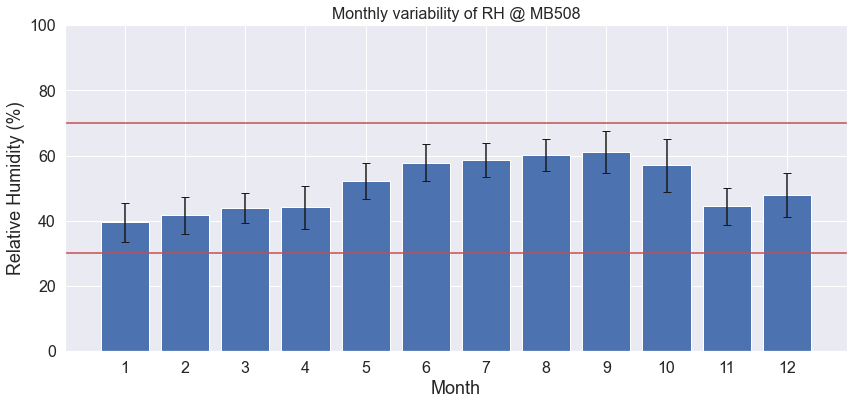

In [179]:
# Plot of box plots of daily PM2.5 data:

Fig6b, ax = plt.subplots()

ax.bar(x=monthlyRH['Month'], #x-coordinates of bars
       height=monthlyRH['mean'], #height of bars
       yerr=monthlyRH['std'],#error bar width
       capsize=4) #length of error bar caps
  
ax.set_ylabel("Relative Humidity (%)",fontsize=18)
ax.set_title('Monthly variability of RH @ '+ name, fontsize=16)
ax.set_ylim(0,100)
ax.axhline(y=30, color='r', linestyle='-')
ax.axhline(y=70, color='r', linestyle='-')
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.xticks(monthlyT['Month'])
plt.xlabel("Month",fontsize=18)

plt.savefig('Fig6b - Monthly variability of RH @ '+ name)

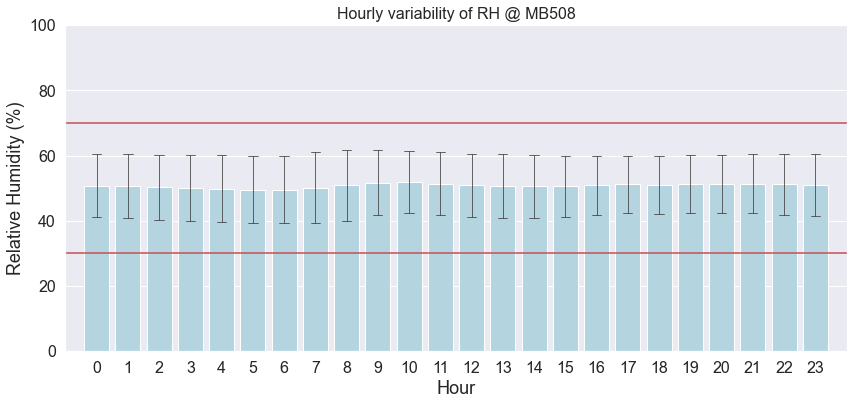

In [180]:
# Plot of box plots of Hourly data:
from matplotlib.ticker import FuncFormatter

Fig6c = sns.barplot(x="Hour", y="RH", ci='sd', data=datacf, color='lightblue',errwidth=0.8, capsize=0.3)
Fig6c.set_ylabel("Relative Humidity (%)",fontsize=18)
Fig6c.set_title('Hourly variability of RH @ '+ name, fontsize=16)

Fig6c.tick_params(axis='x', labelsize=16)
Fig6c.tick_params(axis='y', labelsize=16)
Fig6c.set_ylim(0,100)
Fig6c.set_xlim(-1,24)

Fig6c.xaxis.set_major_formatter(ticker.EngFormatter())
Fig6c.axhline(y=30, color='r', linestyle='-')
Fig6c.axhline(y=70, color='r', linestyle='-')

plt.xlabel("Hour",fontsize=18)

plt.savefig('Fig6c - Hourly variability of RH @ '+ name)

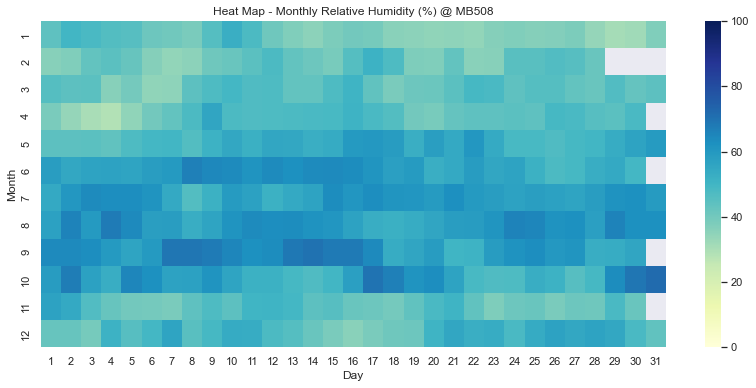

In [181]:
#Heat Map

# Transpose the dataset:

series6 = pd.pivot_table(dailyRH, index = 'Month', columns = 'Day', values = 'mean') 
Fig6d = sns.heatmap(series6, vmin=0, vmax=100, cmap="YlGnBu")
Fig6d.set_title('Heat Map - Monthly Relative Humidity (%) @ '+ name)
plt.savefig('Fig6d - Heat Map - RH levels @ '+ name)

In [182]:
datacfCorr = datacf.drop(['Year','Month','Day','Hour','Minute'], axis = 1)
datacfCorr

,CO2,RH,T,VOCs,PM25,PM10
Date,,,,,,
2021-08-01 00:02:50,NaN,55.400027,21.795940,173.5219,23.0288,23.6961
2021-08-01 00:07:55,NaN,55.410778,21.803152,173.5219,25.9716,26.6803
2021-08-01 00:12:50,NaN,55.357023,21.781516,173.5219,23.0288,23.6961
2021-08-01 00:18:01,NaN,55.378525,21.795940,102.4925,25.9716,26.6803
2021-08-01 00:22:51,NaN,55.378525,21.803152,162.5943,23.0288,23.6961
...,...,...,...,...,...,...
2022-07-31 23:39:11,432.2628,60.065961,23.245552,17.8036,25.9716,26.6803
2022-07-31 23:44:13,433.2794,60.141218,23.274400,77.9054,25.9716,26.6803
2022-07-31 23:49:13,432.2628,60.151969,23.252764,91.5649,31.8572,32.6487


In [183]:
YearlyMeandata = datacfCorr.agg(['mean', 'std', 'count', 'median', 'min', 'max'])

# Export to csv
output_YearlyMeandata  = 'data_' + name + '_YearlyMeandata.csv'
YearlyMeandata.to_csv(output_YearlyMeandata, sep=',')

YearlyMeandata

,CO2,RH,T,VOCs,PM25,PM10
mean,496.589429,50.779598,22.224692,250.215953,22.373883,23.082679
std,93.651760,9.712653,0.634338,204.431256,17.976059,18.474818
count,99796.000000,104458.000000,104458.000000,81092.000000,104458.000000,104458.000000
median,465.810600,50.615832,22.214236,187.181400,17.143200,17.727700
min,380.416200,25.824026,18.074548,6.876000,5.372000,5.790900
max,1387.866800,76.547244,25.019704,1689.726400,270.224000,277.353100


C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

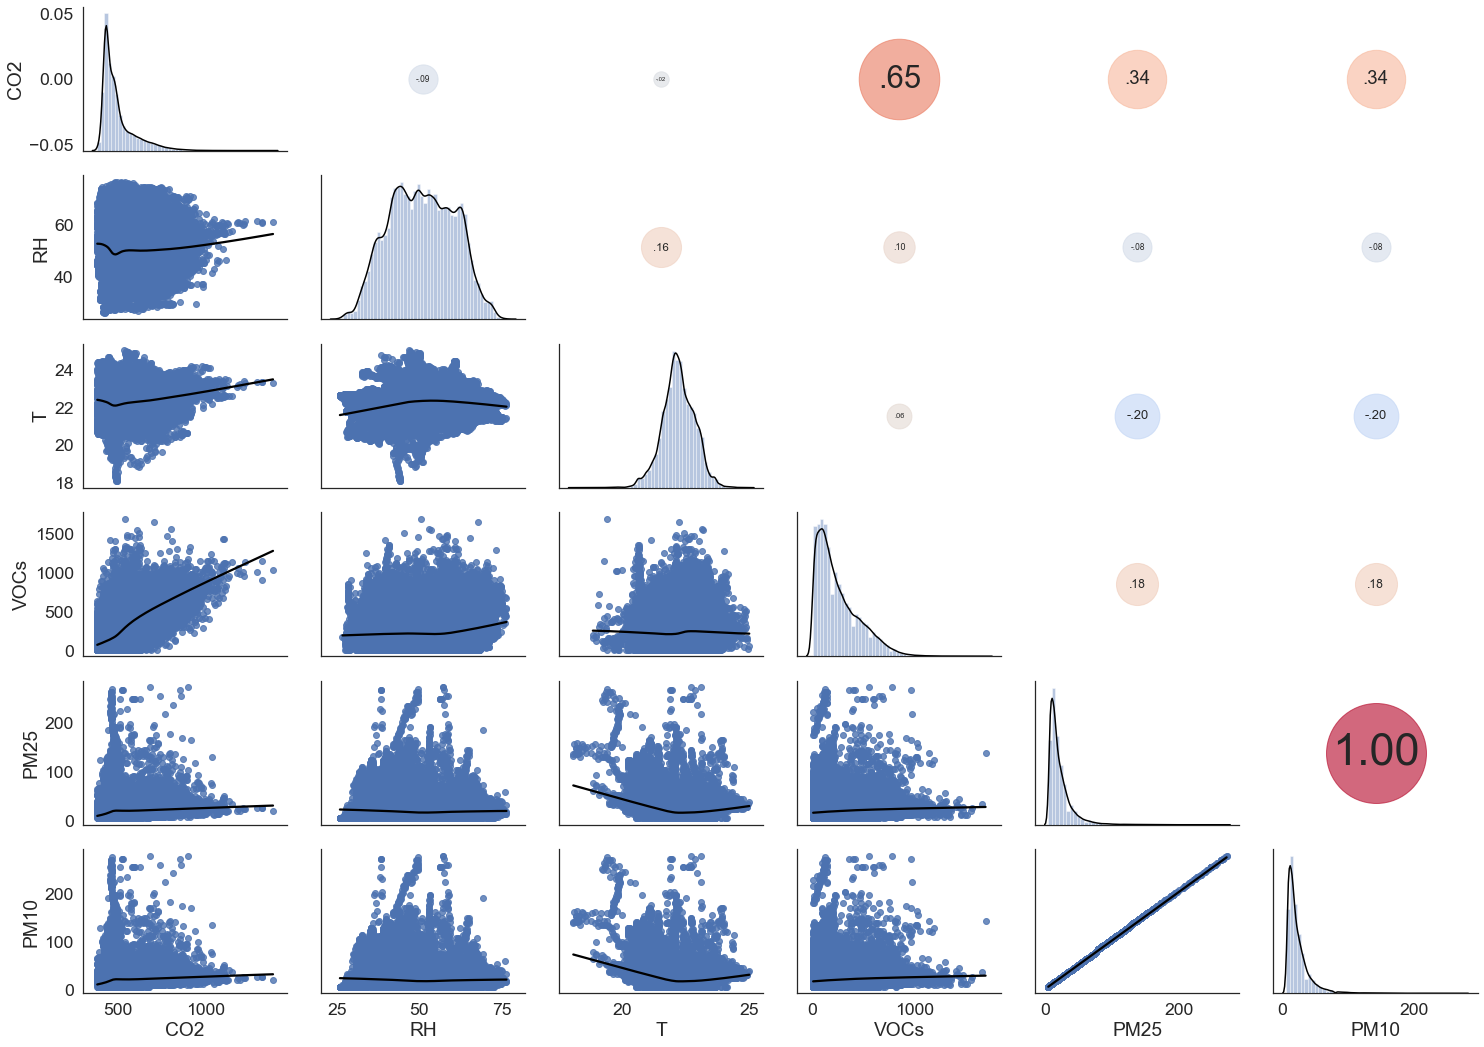

In [184]:
# Evaluation of Spearman correlations between IAQ parameters

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(datacfCorr, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

# Bigger figure
plt.rcParams['figure.figsize'] = [20, 10]

# To save the figure
plt.savefig('Fig7 - Spearman correlations between parameters @ '+ name)

C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nunocanha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

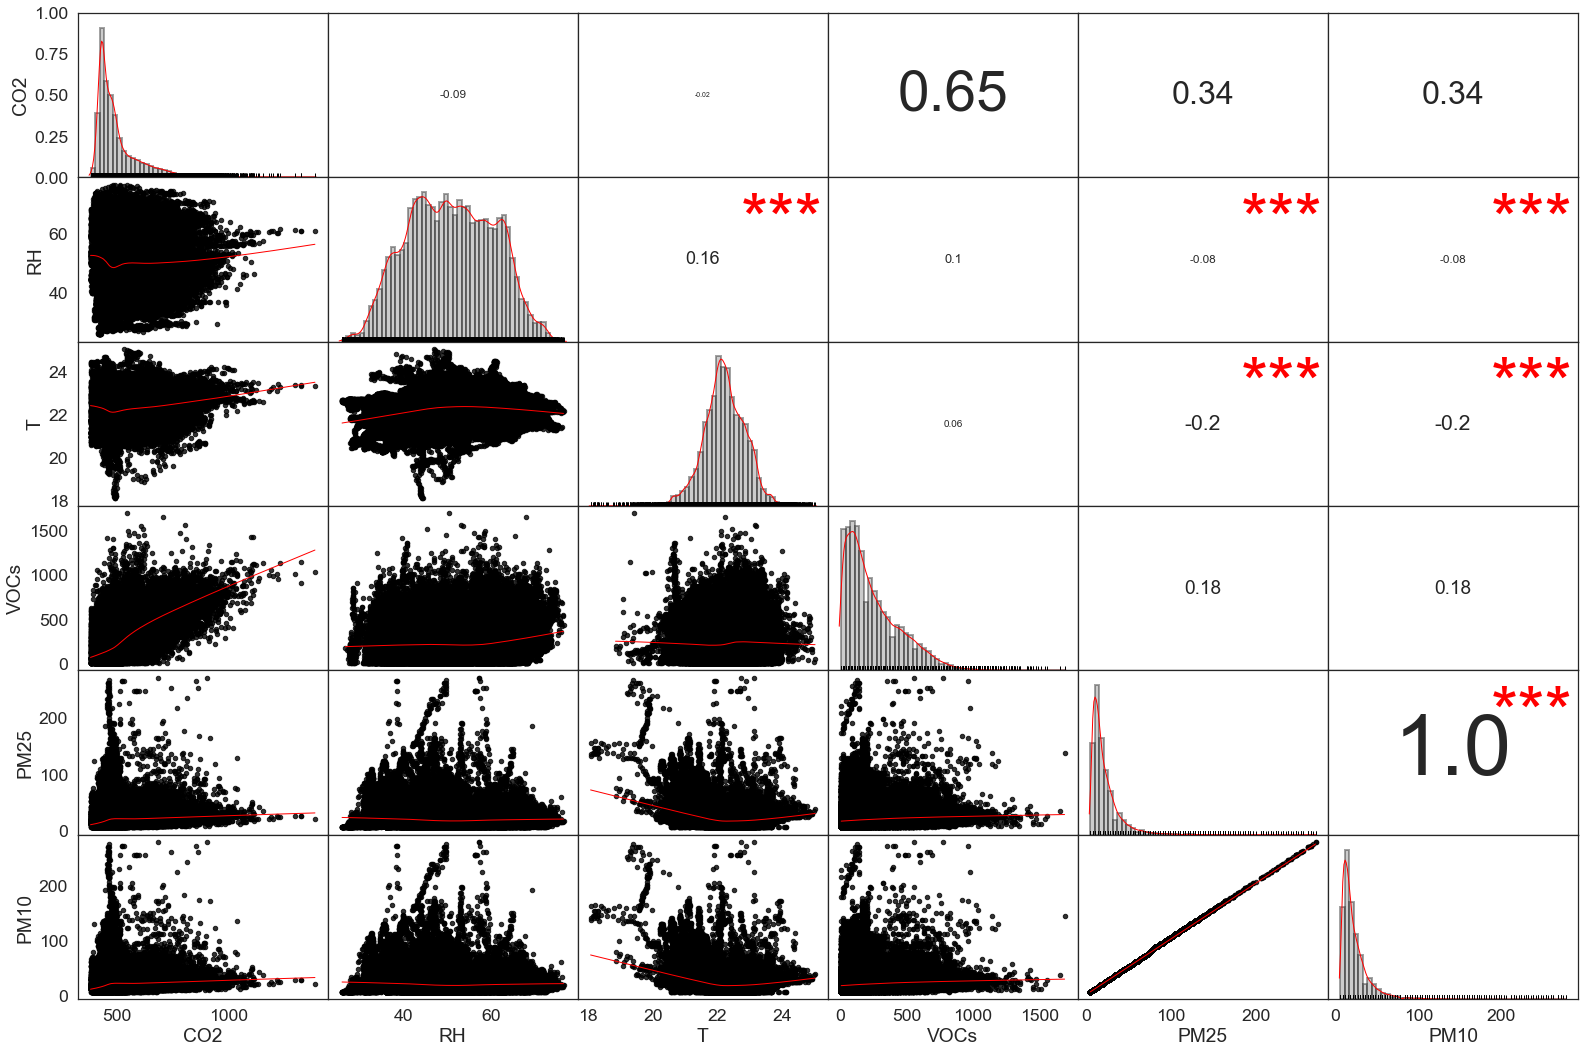

In [185]:
# Evaluation of Spearman correlations between IAQ parameters

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.spearmanr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(datacfCorr, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)
  

plt.savefig('Fig8 - Spearman correlations between parameters @ '+ name)

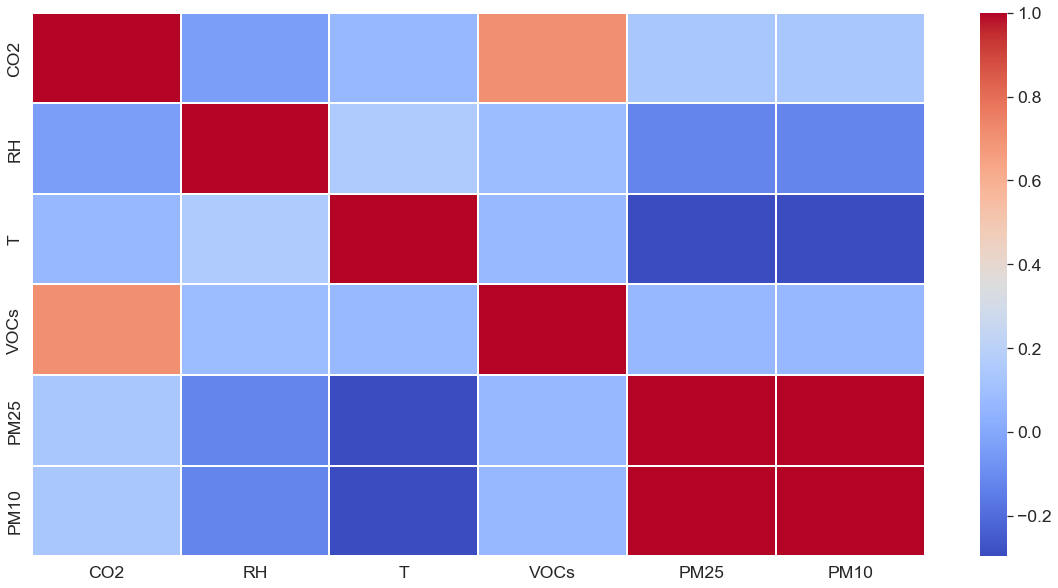

In [186]:
correlation = datacfCorr.corr()
ax = sns.heatmap(data=correlation, cmap='coolwarm', 
                 linewidths=2, cbar=True)

In [187]:
testPM10 = datacf['PM10'].resample(datacf['Hour']).agg(['mean', 'std', 'count', 'median', 'min', 'max'])

ValueError: Invalid frequency: Date
2021-08-01 00:02:50     0
2021-08-01 00:07:55     0
2021-08-01 00:12:50     0
2021-08-01 00:18:01     0
2021-08-01 00:22:51     0
                       ..
2022-07-31 23:39:11    23
2022-07-31 23:44:13    23
2022-07-31 23:49:13    23
2022-07-31 23:54:12    23
2022-07-31 23:59:13    23
Name: Hour, Length: 104458, dtype: int64

In [ ]:
# Hourly data for all parameters:
hourmean=datacf.groupby("Hour").agg("mean")
hourstd=datacf.groupby("Hour").agg("std")

# Export to csv
output_hourmean  = 'data_' + name + '_hourlymean.csv'
hourmean.to_csv(output_hourmean, sep=',')

output_hourstd  = 'data_' + name + '_hourlystd.csv'
hourstd.to_csv(output_hourstd, sep=',')